# Medida de las velocidades de propagación de frentes de llamas

Se han tomados vídeos de la propagación de una llama sobre un canal a rebosar de alcohol isopropílico.

El canal es un paralelepípedo de 1 m de longitud con una acanaladura en la parte superior y refrigerado en su interior por un serpentín con agua a temperatura controlada de manera que la temperatura del alcohol, antes de que avance sobre él la llama, es constante y conocida.

La llama se inicia en un extremo del canal y ésta progresa sobre él hasta alcanzar el otro extremo, momento en que finaliza el experimento (y se apaga manualmente la llama).

Este proceso es el que se ha grabado con una cámara de vídeo Hi8mm, de modo que el encuadre cubriese 40 cm de la longitud del canal (es decir, el ancho de la imagen corresponde a 40 cm). Posteriormente, se ha digitalizado manteniendo la frecuencia de 25 cuadros por segundo del vídeo original (aplicando un proceso de desentrelazado).

De ese vídeo digitalizado se han extraído los fotogramas para tener una serie de imágenes del avance del frente de llama y estudiar por procesamiento digital de las mismas la evolución temporal de dicho frente de llama (en particular, para relacionar su dinámica con la temperatura del alcohol).

Observamos que hay demasiada información en cada una de esas imágenes ya que sólo nos interesa una pequeña región en cada una de ellas (el punto más avanzado, en el centro del frente de llama). Por ello, construimos una imagen sintética, que se denomina streak photograph, de la siguiente manera: tomamos las líneas centrales de los sucesivos fotogramas del vídeo digital, y los colocamos como filas sucesivas de la nueva streak photograph. Así el eje X de la nueva imagen, objeto de este problema, representa la longitud del canal y el eje B (en sentido descendente) el tiempo; la parte clara corresponde a la llama y la parte oscura, a la parte aún sin quemar.

*Nota: En el vídeo ilustrativo, la llama va de derecha a izquierda, pero en la streak photograph del problema, la llama avanza de izquierda a derecha.*

**TAREA**

El objetivo de este ejercicio es que usted determine, a partir del análisis de la streak photograph proporcionada, generada por el procedimiento descrito anteriormente, cuál es la velocidad de la llama (en m/s) en función del tiempo (en s), representándola gráficamente.

Para ello, debe hacer los siguientes pasos:

1. Hacer un esquema, en pseudo-código, del proceso de determinación de la posición del frente de llama.
2. Explicar cómo se realiza el proceso automático de mejora de la imagen (p.ej. filtrado), previo al procesamiento.
3. Explicar cómo determina los píxeles que contienen el frente de llama, esto es, la separación entre la parte quemada (donde existe llama) y la parte de alcohol fresco en la imagen.

*Nota: Tanto el proceso de mejora como el de determinación del frente de llama deben hacerse de forma automática, no manual; en caso contrario, se consideraría el problema no respondido.*

4. Calcular la posición, velocidad y aceleraciones instantáneas del frente de llama en función del tiempo (y representarlas gráficamente).

*Nota: Los datos deben darse en unidades del S.I.*

5. Calcular la frecuencia de la oscilación del frente de llama.

**DATOS**

- `llama_isopropanol.mp4`: vídeo del frente de llamas.

- `streak_photograph.png`: imagen sintética de 713x141 píxeles. Las columnas corresponden al espacio y las filas al tiempo (tiempo inicial en la fila superior; tiempo final en la inferior).

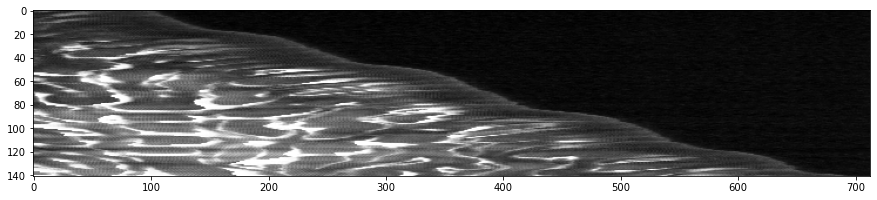

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = "streak_photograph.png"

image = cv2.imread(image)

# converting to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (15, 10))
plt.imshow(gray, cmap="gray")

Aplicamos un [filtro gaussiano](https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html) para difuminar/suaviar la imagen y así eliminar ruido innecesario para su tratamiento.

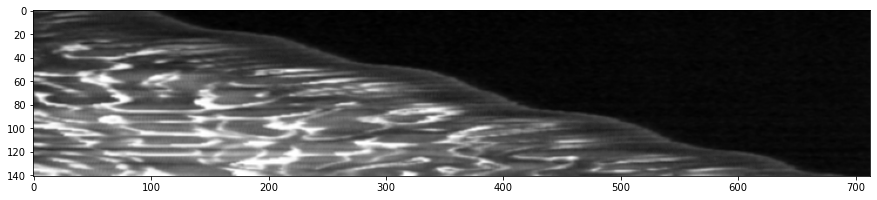

In [2]:
blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.figure(figsize = (15, 10))
plt.imshow(blur, cmap="gray")
plt.savefig("filtro_gausiano.png")

Analizamos histograma para determinar los puntos del frente de llama ([OpenCV Histograms](https://docs.opencv.org/4.5.2/d1/db7/tutorial_py_histogram_begins.html)). La línea de separación corresponde con el mínimo local más cercano al máximo global, es decir, los píxeles menos repetidos cuya intensidad es mínima. Este mínimo se puede determinar con un algoritmo de descenso de gradiente o comparación de valores.

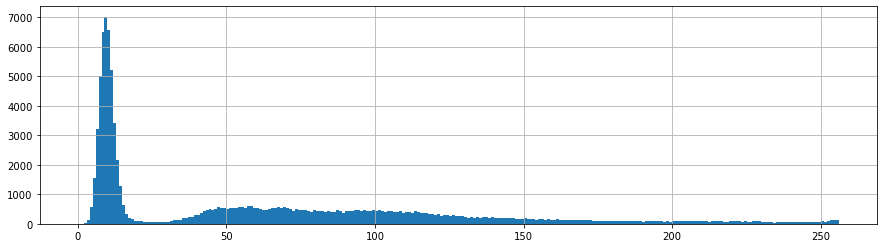

In [3]:
plt.figure(figsize = (15, 4))
x, y, _ = plt.hist(blur.ravel(), 256, [0, 256])
plt.grid(True)
plt.show()

In [4]:
x, y

(array([   0.,    0.,   31.,  139.,  579., 1552., 3201., 5026., 6502.,
        7025., 6572., 5231., 3413., 2169., 1280.,  647.,  318.,  205.,
         173.,  106.,   85.,   97.,   73.,   70.,   57.,   70.,   68.,
          60.,   59.,   60.,   76.,   97.,  130.,  129.,  143.,  192.,
         209.,  237.,  245.,  301.,  305.,  377.,  420.,  459.,  490.,
         475.,  493.,  579.,  527.,  523.,  512.,  534.,  545.,  547.,
         566.,  570.,  546.,  599.,  588.,  544.,  537.,  513.,  476.,
         484.,  502.,  524.,  545.,  554.,  550.,  570.,  550.,  511.,
         439.,  517.,  458.,  457.,  471.,  425.,  415.,  453.,  429.,
         433.,  433.,  415.,  444.,  415.,  391.,  467.,  446.,  374.,
         424.,  447.,  431.,  471.,  460.,  440.,  471.,  448.,  436.,
         477.,  420.,  460.,  441.,  400.,  426.,  419.,  416.,  417.,
         421.,  353.,  394.,  396.,  374.,  424.,  403.,  365.,  361.,
         356.,  342.,  334.,  313.,  319.,  281.,  308.,  305.,  273.,
      

Localizamos aquellos puntos del frente y el valor del píxel.

In [5]:
x_max = np.argmax(x)
x_mins = []
y_mins = []

for i in range(x_max, x_max+50):
    if x[i] > x[i+1] and x[i+1] < x[i+2]:
        x_mins.append(x[i+1])
        y_mins.append(y[i+1])
        print((y[i+1], x[i+1]))
        
index_min = np.argmin(np.array(x_mins))
y_mins[index_min]

(20.0, 85.0)
(24.0, 57.0)
(28.0, 59.0)
(33.0, 129.0)
(45.0, 475.0)
(50.0, 512.0)
(56.0, 546.0)


24.0

A continuación binarizamos la imagen ([OpenCV Image Thresholding](https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html)). A pesar de determinar el valor mínimo de threshold automáticamente, aplicaremos el valor de 20 ya que nos da mejores resultados.

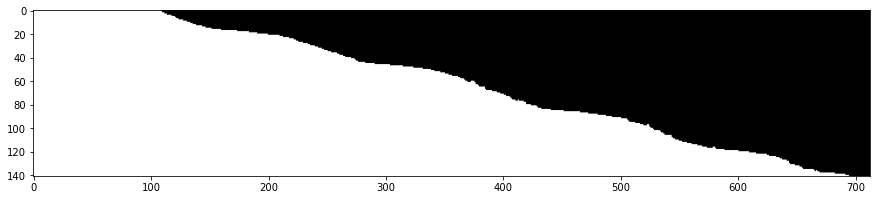

In [6]:
#ret, th = cv2.threshold(blur, y_mins[index_min], 255, cv2.THRESH_BINARY)
ret, th = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (15, 10))
plt.imshow(th, cmap="gray")
plt.savefig("threshold.png")

Determinamos la línea de separación mediante el algoritmo [Canny Edge Detection](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

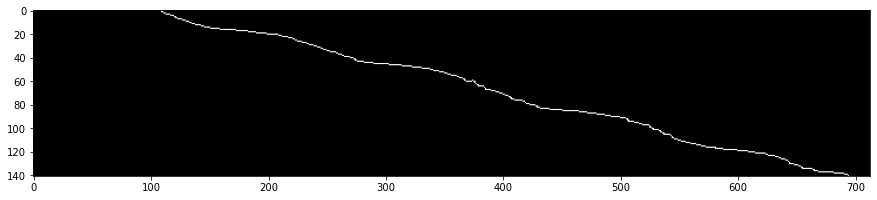

In [7]:
edges = cv2.Canny(th, 100, 250)

plt.figure(figsize = (15, 10))
plt.imshow(edges, cmap="gray")
plt.savefig("canny.png")

Antes de graficar la posición frente al tiempo debemos hacer una transformación a nuestro datos. Primero hay que tener en cuenta que cada fila en nuestra matriz de píxeles corresponde con el tiempo. A medida que iteramos sobre las filas obtenemos el movimiento de la llama.

In [8]:
edges[0] # tiempo 0, fila 1

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

El eje X correspondiente al tiempo será nuestro total de píxeles (140) dividido por los 25fps (frames per second) con los que fue construida la imagen. Este tiempo final coincide con la duración del vídeo.

In [9]:
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])

t = indices[0]/25
x = indices[1]

print(list(coordinates))

[(0, 109), (1, 109), (1, 110), (2, 111), (2, 112), (3, 113), (3, 114), (3, 115), (3, 116), (4, 117), (4, 118), (4, 119), (5, 120), (5, 121), (6, 121), (6, 122), (7, 123), (7, 124), (7, 125), (7, 126), (8, 127), (8, 128), (8, 129), (9, 130), (9, 131), (9, 132), (10, 133), (10, 134), (11, 135), (11, 136), (11, 137), (12, 138), (12, 139), (12, 140), (12, 141), (12, 142), (13, 143), (13, 144), (13, 145), (14, 146), (14, 147), (14, 148), (14, 149), (14, 150), (15, 151), (15, 152), (15, 153), (15, 154), (15, 155), (15, 156), (15, 157), (15, 158), (16, 159), (16, 160), (16, 161), (16, 162), (16, 163), (16, 164), (16, 165), (16, 166), (16, 167), (16, 168), (16, 169), (16, 170), (16, 171), (16, 172), (17, 173), (17, 174), (17, 175), (17, 176), (17, 177), (17, 178), (17, 179), (17, 180), (17, 181), (17, 182), (18, 183), (18, 184), (18, 185), (18, 186), (18, 187), (18, 188), (18, 189), (19, 190), (19, 191), (19, 192), (19, 193), (19, 194), (19, 195), (19, 196), (19, 197), (19, 198), (20, 199), (2

In [10]:
x, t

(array([109, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
        211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
        224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
        237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
        250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
        263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 274,
        275, 276, 277, 278, 279, 280, 281, 282, 283

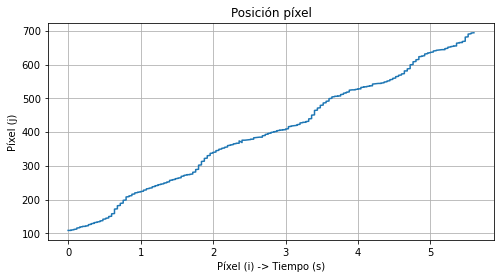

In [11]:
plt.figure(figsize = (8, 4))
plt.title("Posición píxel")
plt.xlabel("Píxel (i) -> Tiempo (s)")
plt.ylabel("Píxel (j)")
plt.plot(t, x)
plt.grid(True)

Para el eje Y debemos mapear los valores de los píxeles al rango `0-40cm`. Hacemos una transformación lineal del tipo 

$$
x_{mapeado} = Ax_{antiguo} + B
$$

In [12]:
A = 0.4 / (x[-1] - x[0])
B = -A * x[0]

Finalmente calculamos la posición del frente de llamas mediante una regresión lineal.

$$
x = c_1t + c_2
$$

Coefficients:  [0.07068882]
Independent term:  0.0008662541987803363
Mean Squared Error (MSE): 0.00
R2: 1.00


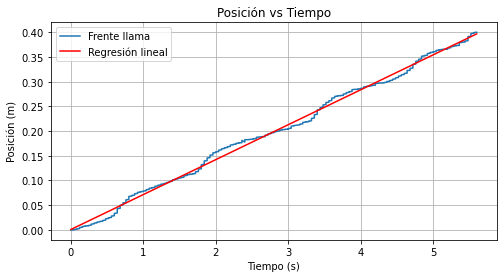

<Figure size 432x288 with 0 Axes>

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# eje y la posición
y = A*x + B
#y = np.flip(y)
# eje x = t

# Creamos el objeto para regresion lineal
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(t.reshape(-1, 1), y)
# Hacemos las predicciones
y_pred = regr.predict(t.reshape(-1, 1))
 
# Tangente
print("Coefficients: ", regr.coef_)
# Término independiente
print("Independent term: ", regr.intercept_)
# MSE
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
# R2, tiende a 1.0
print("R2: %.2f" % r2_score(y, y_pred))

plt.figure(figsize = (8, 4))
plt.plot(t, y, label="Frente llama")
plt.plot(t, y_pred, color="red", label="Regresión lineal")
plt.title("Posición vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("plot_regresion.png")

Para calcular la velocidad hemos de tener en cuenta que la llama (línea de puntos) tiene un comportamiento sinusoidal con respecto a la línea de regresión, de tal manera que podemos establecer un modelo para la velocidad tal que 

$$
v = \frac{dx}{dt} + A \big( sin(wt+\phi) \big)
$$

Si comparamos la posición de los píxeles del frente de llama frente a la posición calculada mediatne regresión podemos visualizar el comportamiento oscilatorio del frente de llamas.

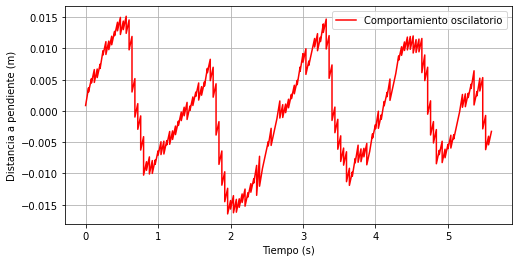

<Figure size 432x288 with 0 Axes>

In [14]:
y_dif = y_pred - y

plt.figure(figsize = (8, 4))
plt.plot(t, y_dif, color="red", label="Comportamiento oscilatorio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia a pendiente (m)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("plot_oscilaciones.png")

Para determinar los diferentes parámetros de nuestro modelo para la velocidad, y con el objetivo de calcular la frecuencia de oscilación del frente de llama, necesitamos calcular la **Transformada de Fourier** de nuestra onda.

Máximo valor de fft:  2.6190507700468113
Índice del máximo valor:  4
Frecuencia para valor máximo (Hz):  0.16474464579901152
Velocidad angular w (rad/s):  1.0351211379208543
Estimación amplitud de onda (m):  0.015816972311664637
Estimación phi:  0.0


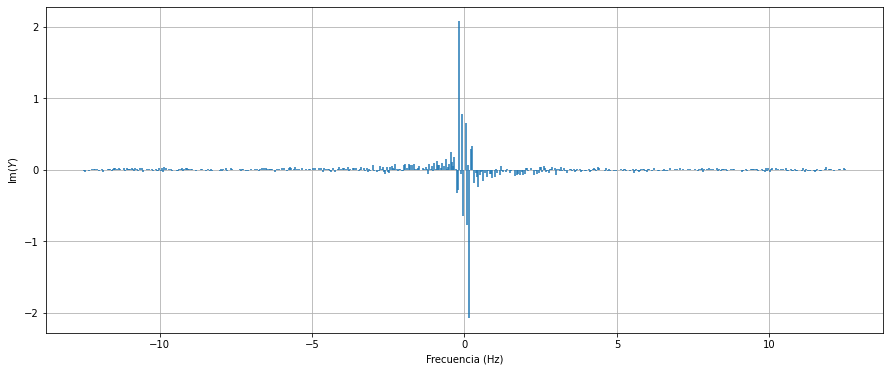

In [15]:
from scipy.fftpack import fft, fftfreq

n = len(t) # número de intervalos
dt = 1/25 # espaciado t[1]-t[0]
 
Y = fft(y_dif) #/ n # Normalizada: dividir por n
f = fftfreq(n, dt) # Recuperamos las frecuencias

print("Máximo valor de fft: ", np.abs(Y).max())

y_max_index = np.argmax(np.abs(Y))
print("Índice del máximo valor: ", y_max_index)
print("Frecuencia para valor máximo (Hz): ", f[y_max_index])

w = 2*np.pi*f[y_max_index]
print("Velocidad angular w (rad/s): ", w)

amplitude = (y_dif.max() - y_dif.min()) / 2
print("Estimación amplitud de onda (m): ", amplitude)

phi = round(y_dif[0], 2)
print("Estimación phi: ", phi)


plt.figure(figsize = (15, 6))
plt.vlines(f, 0, Y.imag) # Representamos la parte imaginaria
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Im($Y$)")
#plt.plot(f, np.abs(Y)) # ?
plt.grid(True)
plt.savefig("plot_fft.png")

Con estos datos tenemos que la velocidad y la aceleración son respectivamente

In [16]:
from sympy import Symbol, diff, sin

T = Symbol("T")

X = regr.coef_[0] * T + regr.intercept_
print("Pocisión frente llama (m): ", X)

dX = diff(X, T)
V = dX + amplitude * (sin(w * T + phi))
v = [V.subs(T, i) for i in t]
print("Velocidad frente llama (m/s): ", V)

A = diff(V, T)
a = [A.subs(T, i) for i in t]
print("Aceleración frente llama (m/s2): ", A)

Pocisión frente llama (m):  0.0706888185535438*T + 0.000866254198780336
Velocidad frente llama (m/s):  0.0158169723116646*sin(1.03512113792085*T) + 0.0706888185535438
Aceleración frente llama (m/s2):  0.0163724823777129*cos(1.03512113792085*T)


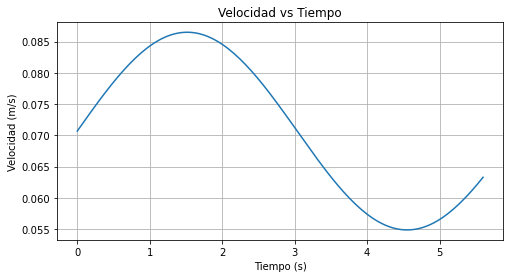

In [17]:
plt.figure(figsize = (8, 4))
plt.title("Velocidad vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.plot(t, v)
plt.grid(True)
plt.savefig("plot_velocidad.png")

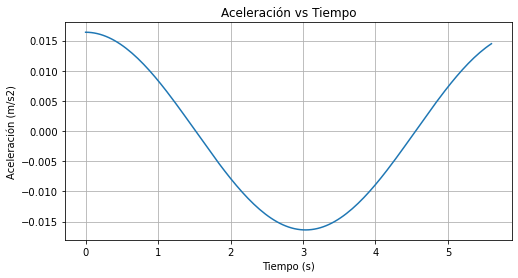

In [18]:
plt.figure(figsize = (8, 4))
plt.title("Aceleración vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (m/s2)")
plt.plot(t, a)
plt.grid(True)
plt.savefig("plot_aceleracion.png")